In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Simple model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer = nn.Linear(10, 1)
        
    def forward(self, x):
        return self.layer(x)

# Generate dummy data
X = torch.randn(100, 10)
y = torch.randn(100, 1)

# Create models
model_sgd = SimpleNN()
model_adam = SimpleNN()
model_rmsprop = SimpleNN()

# Initialize all models with same parameters for fair comparison
state_dict = model_sgd.state_dict()
model_adam.load_state_dict(state_dict)
model_rmsprop.load_state_dict(state_dict)

# Create optimizers
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.01)
optimizer_rmsprop = optim.RMSprop(model_rmsprop.parameters(), lr=0.01)

# Loss function
criterion = nn.MSELoss()

In [ ]:
# Training
losses_sgd = []
losses_adam = []
losses_rmsprop = []

for epoch in range(100):
    # SGD
    optimizer_sgd.zero_grad()
    output_sgd = model_sgd(X)
    loss_sgd = criterion(output_sgd, y)
    loss_sgd.backward()
    optimizer_sgd.step()
    losses_sgd.append(loss_sgd.item())
    
    # Adam
    optimizer_adam.zero_grad()
    output_adam = model_adam(X)
    loss_adam = criterion(output_adam, y)
    loss_adam.backward()
    optimizer_adam.step()
    losses_adam.append(loss_adam.item())
    
    # RMSprop
    optimizer_rmsprop.zero_grad()
    output_rmsprop = model_rmsprop(X)
    loss_rmsprop = criterion(output_rmsprop, y)
    loss_rmsprop.backward()
    optimizer_rmsprop.step()
    losses_rmsprop.append(loss_rmsprop.item())

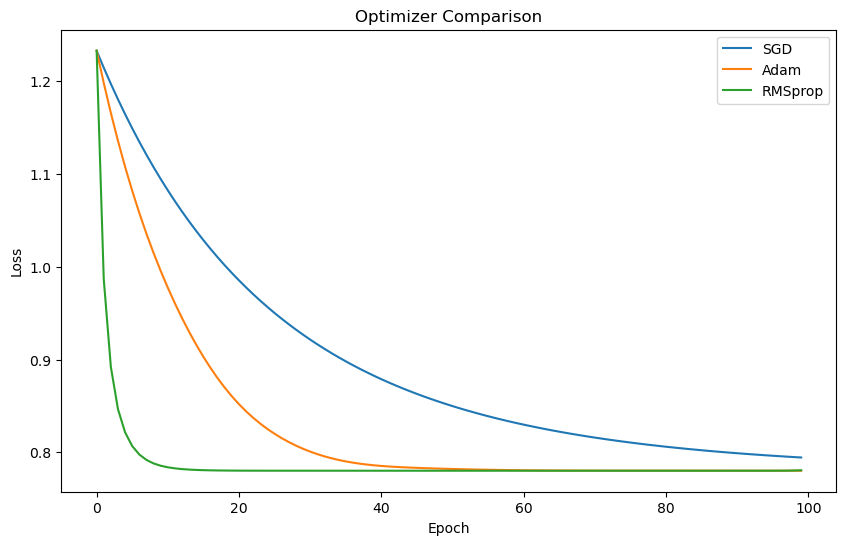

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(losses_sgd, label='SGD')
plt.plot(losses_adam, label='Adam')
plt.plot(losses_rmsprop, label='RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Optimizer Comparison')
plt.legend()
plt.show()